In [130]:
import numpy as np
import pandas as pd
from sympy.abc import x, y
from sympy import sqrt, exp, pi, E, log
from sympy import Symbol, lambdify, symbols, simplify, Matrix
from matplotlib import pyplot as plt
%matplotlib inline
sigma = Symbol("sigma")
mu = Symbol("mu")



In [132]:
from io import StringIO
from unittest import TestCase

import pandas as pd
from pandas.testing import assert_series_equal
import numpy as np

from malice.optimizer import MaliceOptimizer, regularization_penalty

In [25]:
sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

In [32]:
def normal_pdf():
    frac = 1/(sigma


In [64]:
frac = 1/(sigma * sqrt(2*pi))
exp = (((x-mu)/sigma)**2)/-2
norm_pdf = frac*E**exp
norm_logpdf = log(norm_pdf)
norm_logpdf

log(sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma))

In [68]:
deriv = norm_logpdf.diff(x)

In [72]:
hmm = lambdify((x, sigma, mu), deriv, "numpy")

In [77]:
hmm(np.array([3, 9, 3]), np.array([2, 2, 2]), np.array([1, 1, 1]))

array([-0.5, -2. , -0.5])

In [54]:
d_norm_pdf = norm_pdf.diff(x).subs({mu: 0, sigma: 1})
def num_d_norm_pdf(x_num):
    return d_norm_pdf.subs(x, x_num).evalf()


In [56]:
num_d_norm_pdf(1)

-0.241970724519143

In [60]:
xs = np.arange(-5, 5, .1)
ys = [num_d_norm_pdf(x_val) for x_val in xs]

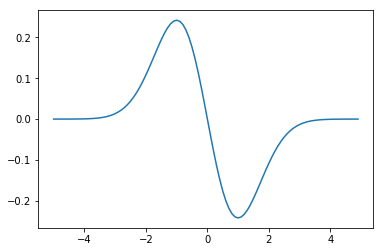

In [61]:
plt.plot(xs, ys)

In [103]:
kd_exp, koff_exp, dR2, amp_scaler = symbols("kd_exp koff_exp dR2 amp_scaler")

visible, titrant, i_ref = symbols("visible titrant I_ref")
dw = Symbol("\\Delta \\omega")
i_ref

I_ref

In [149]:
Kd = 10**kd_exp
koff = 10**koff_exp
kon = koff/Kd

dimer = ((visible + titrant + Kd) -
            sqrt((visible + titrant + Kd)**2 -
            4*visible * titrant))/2

pb = dimer/visible
pa = 1 - pb

free_titrant = titrant - dimer
kr = koff
kf = free_titrant * kon
kex = kr + kf

#TODO(auberon): Do something
# Adjust the amplitude if the visible concentration is not equal
# for all points
# visibleconc = list(self.data.visible.drop_duplicates())
# if len(visibleconc) > 1:
#     amp_scaler = amp_scaler*(self.data.visible/np.mean(visibleconc))

broad_denom = (kex**2 + (1-5*pa*pb)*dw**2)**2 + 4*pa*pb*(1-4*pa*pb)*dw**4
i_broad = pa*pb*(dw**2)*kex * ((kex**2)+(1-5*pa*pb)*(dw**2))/broad_denom
ihat = i_ref/(pa + pb + i_ref*(pb*dR2 + i_broad)/amp_scaler)
cs_broad = pa*pb*(pa-pb)*(dw**3) * ((kex**2)+(1-3*pa*pb)*(dw**2))/broad_denom
cshat = pb*dw - cs_broad
result = Matrix([ihat, cshat])

In [129]:
runnable = lambdify((kd_exp, koff_exp, dR2, amp_scaler, visible, titrant, i_ref, dw),result, "numpy")

In [152]:
# kd_exp, koff_exp, dR2, amp_scaler
# visible, titrant, i_ref dw
def _test_residues():
    data = """residue,15N,1H,intensity,titrant,visible
6,124.567,7.763,3248421.0,0.0,150.0
7,126.776,8.349,5053537.0,0.0,150.0
9,121.124,8.202,2062229.0,0.0,150.0
6,124.565,7.763,3191240.0,7.9,150.0
7,126.777,8.349,4964073.0,7.9,150.0
9,121.125,8.201,2136456.0,7.9,150.0"""
    data_file = StringIO(data)
    return pd.read_csv(data_file)

def _test_object():
    return MaliceOptimizer(data=_test_residues(),
                           larmor=500,
                           nh_scale=0.2,
                           lam=0.015)

optimizer = _test_object()

# TODO(auberon): Refactor so this logic doesn't need to be in the test
residue_params = optimizer.reference.copy()
residue_params['dw'] = np.array([7, 8, 9])
df = pd.merge(optimizer.data, residue_params, on='residue')

runnable = lambdify((kd_exp, koff_exp, dR2, amp_scaler, visible, titrant, i_ref, dw),cshat, "numpy")

res = runnable(1, 2, 3, 4, df["visible"], df["titrant"], df["I_ref"], df["dw"])
print(res)


0    0.000000
1    0.343206
2    0.000000
3    0.391781
4    0.000000
5    0.440175
dtype: float64


In [ ]:

cs_broad = pa*pb*(pa-pb)*np.power(df.dw, 3) * (np.square(kex)+(1-3*pa*pb)*np.square(df.dw))/broad_denom
cshat = pb*df.dw - cs_broad


In [93]:
Symbol("\\Delta \\omega")

\Delta \omega

In [114]:
v, s = symbols("v s")

In [120]:
simple = v**2 * s

In [121]:
cool = lambdify((v, s), simple, "numpy")

In [122]:
cool(np.array([3, 4, 5]), 7)

array([ 63, 112, 175])